In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fforge.inference.emulator import Emulator
from fforge.utils.utils import vr_norm, vaz_norm, generate_ict_128x128_disc_tri_slopes, nullv
import fforge.utils.units as u

# Load the emulator

In [2]:
#setup emulator
labels = ["vphi", "vr"]
pths = [
    "/home/aleruzza/UNI/SCIENCE/UnetEmu/trained_models/vphi_256/model__epoch_1980_test_vaz_256.pth",
    "/home/aleruzza/UNI/SCIENCE/UnetEmu/trained_models/vr_256/model__epoch_1980_test_vr_256.pth",
]
params = [
    "/home/aleruzza/UNI/SCIENCE/UnetEmu/trained_models/vphi_256/params.py",
    "/home/aleruzza/UNI/SCIENCE/UnetEmu/trained_models/vr_256/params.py",
]

#functions used to denormalize the emulator output
norm_funcs = [vaz_norm, vr_norm]

emu = Emulator(
    model_pths=pths,
    labels=["vphi", "vr"],
    model_params=params,
    norm_funcs=norm_funcs,
    ict_gen=generate_ict_128x128_disc_tri_slopes,
)

# Test the emulator usage

In [3]:
emu.emulate_v3d?

Signature:
emu.emulate_v3d(
    coord,
    alpha,
    h,
    planetMass,
    flaringIndex,
    R_p,
    phi_p,
    extrap_vfunc,
    sigmaSlope=None,
    norm=True,
    interp_3d='SPHERICAL',
    **extrap_kwargs,
)
Docstring: <no docstring>
File:      ~/UNI/SCIENCE/UnetEmu/fforge/src/fforge/inference/emulator.py
Type:      method

In [4]:
%%time
#define the coordinates
xy = np.linspace(-3,3,256)*u.au
xx, yy = np.meshgrid(xy,xy)
coord = {'x': xx, 'y': yy, 'z': xx*0}

#define the parameters
params = {
    'alpha': 1e-2,
    'h': 0.1,
    'planetMass': 3e-3,
    'flaringIndex': 0.5}

#emulate
emulated_V = emu.emulate_v3d(coord, **params, R_p=1*u.au, phi_p=np.pi/3, extrap_vfunc=nullv)

computing phi
CPU times: user 17.3 s, sys: 2.91 s, total: 20.2 s
Wall time: 5.37 s


In [5]:
%%timeit
res = emu.emulate(alpha=1e-3, h=0.1, planetMass=1e-3, sigmaSlope=1, flaringIndex=0.25, fields=['vphi', 'vr'], norm=True)

3.14 s ± 94 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
G = 6.67384e-11

In [16]:
u.MSun

1.9891e+30

In [17]:
np.sqrt(G * u.MSun / u.au)*1e3*np.sqrt(xy**2+xy**2)**-0.5

array([ 37.39148088,  37.53898237,  37.68824332,  37.83929901,
        37.99218569,  38.14694065,  38.30360226,  38.46220999,
        38.62280446,  38.78542752,  38.95012222,  39.11693293,
        39.28590535,  39.45708657,  39.63052515,  39.80627114,
        39.98437615,  40.16489344,  40.34787795,  40.53338641,
        40.72147738,  40.91221134,  41.10565077,  41.30186025,
        41.50090651,  41.70285858,  41.90778787,  42.11576824,
        42.32687617,  42.54119084,  42.75879426,  42.97977141,
        43.20421039,  43.43220253,  43.66384258,  43.89922889,
        44.13846351,  44.38165248,  44.62890594,  44.88033838,
        45.13606888,  45.39622128,  45.66092453,  45.93031285,
        46.20452611,  46.48371008,  46.76801676,  47.05760477,
        47.35263967,  47.65329437,  47.95974958,  48.27219425,
        48.59082606,  48.91585193,  49.24748862,  49.58596331,
        49.93151428,  50.28439156,  50.64485776,  51.01318885,
        51.38967506,  51.77462183,  52.16835086,  52.57

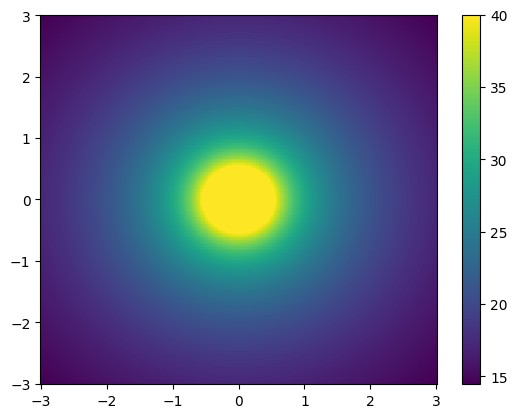

In [23]:
xx, yy = np.meshgrid(xy,xy)
vkep =  np.sqrt(G * u.MSun)*1e-3*np.sqrt(xx**2+yy**2)**-0.5
plt.pcolormesh(xy/u.au, xy/u.au,vkep, vmax=40)
plt.colorbar()

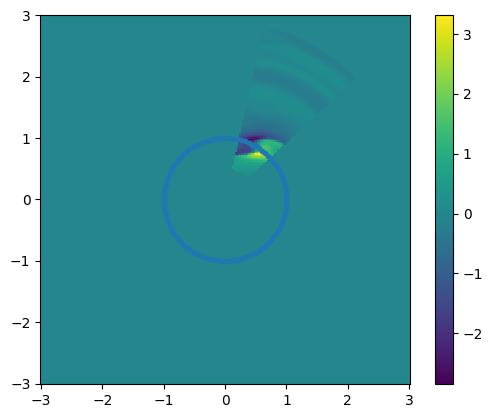

In [29]:
plt.pcolormesh(xy/u.au, xy/u.au, emulated_V[1])
plt.colorbar()
phi = np.linspace(-np.pi, np.pi, 100)
plt.scatter(np.cos(phi), np.sin(phi), marker='.')
plt.gca().set_aspect('equal')


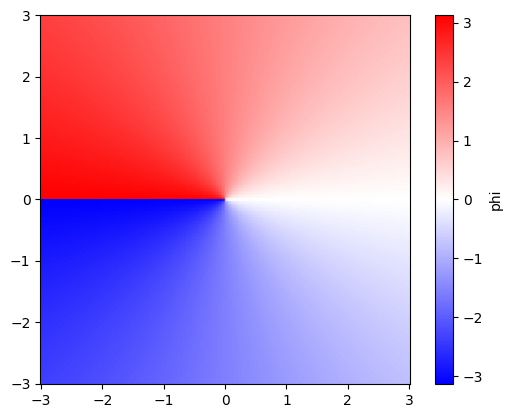

In [28]:
plt.pcolormesh(xy/u.au, xy/u.au, np.arctan2(coord['y'], coord['x']), cmap='bwr')
plt.colorbar(label='phi')
plt.gca().set_aspect('equal')